In [1]:
%env CUDA_VISIBLE_DEVICES=2

import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import copy
import time
from torchsummary import summary
import torch.onnx

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

env: CUDA_VISIBLE_DEVICES=2


In [2]:
# Applying Transforms to the Data
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

Predcition 1 : tensor(354) , Score:  tensor(45673.1211, grad_fn=<SelectBackward>)
Predcition 2 : tensor(293) , Score:  tensor(22036.9922, grad_fn=<SelectBackward>)
Predcition 3 : tensor(83) , Score:  tensor(6758.5166, grad_fn=<SelectBackward>)


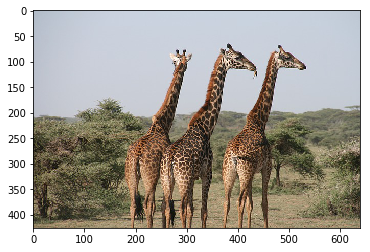

In [4]:


# Load pretrained ResNet50 Model
resnet50 = models.resnet50(pretrained=True)

resnet50.eval()

test_image = Image.open('pixabay-test-animals/giraffe-1330814_640.jpg')
plt.imshow(test_image)

transform = image_transforms['test']
test_image_tensor = transform(test_image)

image_tensor = test_image_tensor.view(1, 3, 224, 224)

output = resnet50(image_tensor)

ps = torch.exp(output)
topk, topclass = ps.topk(3, dim=1)
for i in range(3):
    print("Predcition", i+1, ":", topclass[0][i], ", Score: ", topk[0][i])

